# Heart Disease Prediction by Savo Vukovic

- Медицинска дијагноза одређених обољења, на пољу медицине помоћу машинског учења, је изузетно напредовала у протеклих неколико година. Главна примена се види у томе да се пацијентима (без икаквог трошка и надокнаде) поставља скоро савршена дијагностика, препоручују лекови који су се показали најбоље за одређено обољење и откривају обољења којима су сами пацијенти склони, све уз помоћ напретка на пољу машинског учења. Ове предикције су засноване на јавно доступним подацима који су прикупљани током година.

## Libraries

In [1]:
import sys
import scipy
import numpy
import matplotlib
import pandas as pd
import sklearn
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from collections import Counter

## Dataset
- source of the dataset: 
    https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data 

### Documentation for Visualization using matplotlib.
- https://matplotlib.org/


(303, 14)
class       1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: class, dtype: float64


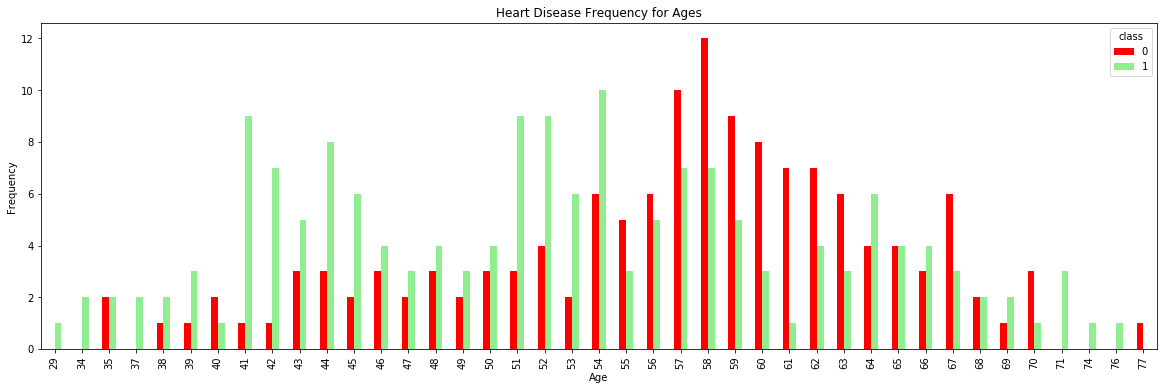

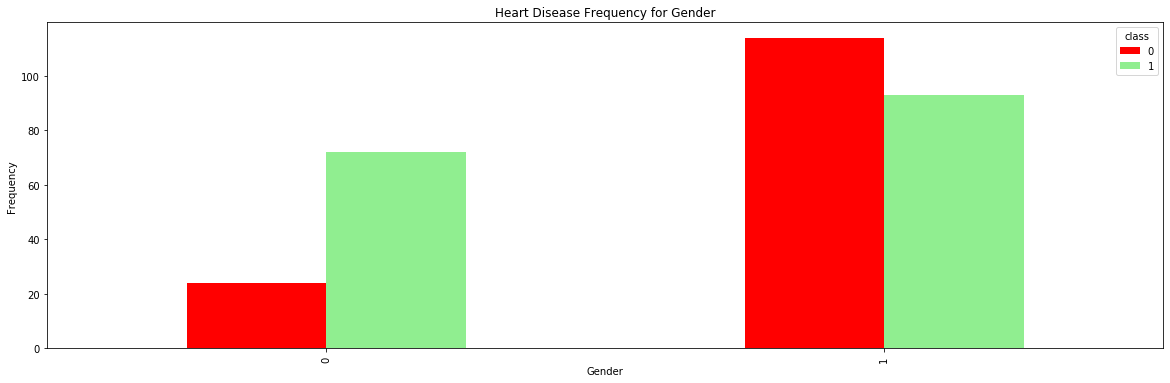

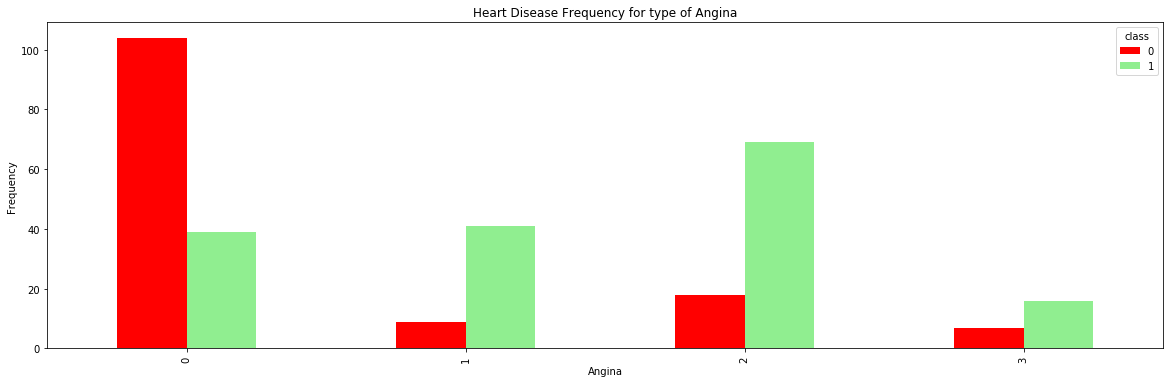

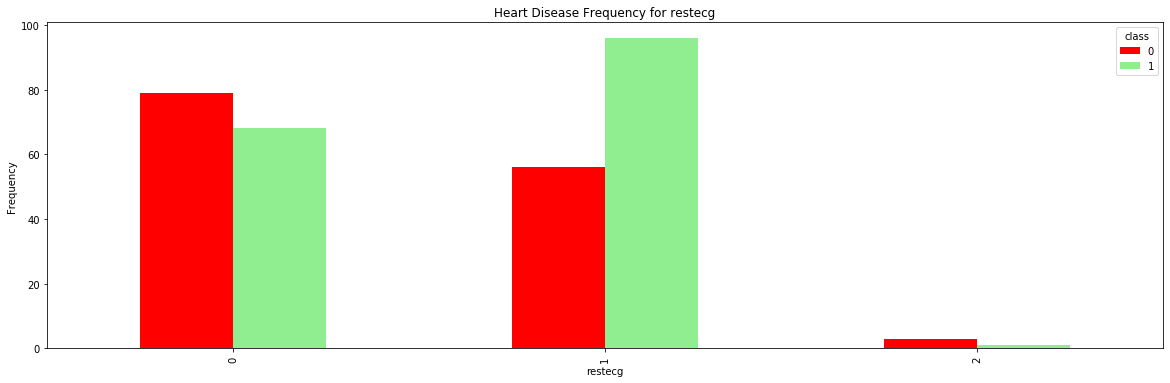

In [2]:
names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','class']
dataset = pd.read_csv("heart-disease.data", names=names)

# let's see how the dataset looks like
print(dataset.shape)

# Correlation values
print(dataset.corr()["class"].abs().sort_values(ascending=False))

pd.crosstab(dataset["age"],dataset["class"]).plot(kind="bar",figsize=(20,6), color=['Red','LightGreen'])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

pd.crosstab(dataset["sex"],dataset["class"]).plot(kind="bar",figsize=(20,6), color=['Red','LightGreen'])
plt.title('Heart Disease Frequency for Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

pd.crosstab(dataset["cp"],dataset["class"]).plot(kind="bar",figsize=(20,6), color=['Red','LightGreen'])
plt.title('Heart Disease Frequency for type of Angina')
plt.xlabel('Angina')
plt.ylabel('Frequency')
plt.show()

pd.crosstab(dataset["restecg"],dataset["class"]).plot(kind="bar",figsize=(20,6), color=['Red','LightGreen'])
plt.title('Heart Disease Frequency for restecg')
plt.xlabel('restecg')
plt.ylabel('Frequency')
plt.show()



## Attributes
- **age**, старост пацијента
- **sex**, пол пацијента
- **cp**, тип бола у грудима [1: типична ангина,2: атипична ангина,3: неагинални бол,4: асимптоматски]
- **trestbps**, индикатор за крвни притисак
- **chol**, ниво холестерола
- **fbs**, индикатор везан за шећер
- **restecg**, резултат ЕКГ-а
- **thalach**, максимални ниво крвног притиска током обзервације пацијента
- **exang**, ангина изазвана напором (да или не)
- **oldpeak**, СТ депресија изазвана вежбањем у односу на одмор
- **slope**, нагиб врха СТ сегмента вежбе
- **ca**, број главних пловила
- **thal**, време трајања теста изражено у минутима

## Class distribution

In [3]:
print(dataset.groupby('class').size())

class
0    138
1    165
dtype: int64


## Validation (training) and test sets
- 20% of the whole dataset will be used for the validation set while the other 80% will be used for training.

In [4]:
array = dataset.values
X = array[:,0:13]
Y = array[:,13]

validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = 14)

## Models

In [5]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='auto')))
models.append(('SVM', SVC(kernel='linear')))
models.append(('KNN', KNeighborsClassifier()))

![](models.png "Models")

## Cross validation
- We'll split our dataset into 10 different parts (9 for training and 1 for testing), repeat that for every block.

## Applying cross-validation, splitting the data

In [6]:
seed = 14
scoring = 'accuracy'

# cross validate all the models
results = []
names = []

for name, model in models:
    # model_selection.KFold basically splits the data into different parts.
    kfold = model_selection.KFold(shuffle = True, n_splits=10,random_state = seed)
    # apply cross validation
    cross_val_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    # for each model append cross validation scores.
    results.append(cross_val_results)
    # get the name of the current model (this is mainly used for printing)
    names.append(name)
    print("%s: %f (%f)" % (name, cross_val_results.mean(), cross_val_results.std()))

LR: 0.843000 (0.051633)
SVM: 0.851000 (0.050267)
KNN: 0.652333 (0.091376)


## Making predictions
- mean score of **Support Vector Machines** at the time of the testing was near 90%, which makes the model an apsolute winner

In [7]:
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    print(name)
    print(accuracy_score(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))

LR
0.7868852459016393
              precision    recall  f1-score   support

         0.0       0.86      0.66      0.75        29
         1.0       0.74      0.91      0.82        32

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61

SVM
0.819672131147541
              precision    recall  f1-score   support

         0.0       0.88      0.72      0.79        29
         1.0       0.78      0.91      0.84        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61

KNN
0.5737704918032787
              precision    recall  f1-score   support

         0.0       0.55      0.59      0.57        29
         1.0       0.60      0.56      0.58        32

    accuracy                           0.57        61
   macro avg       0.57      0.57      0.57        61
weighte

In [8]:
subject_savo = [[23,1,0,120,233,0,0,90,1,2.3,0,0,1]]
for name, model in models:
    model.fit(X_train, Y_train)
    prediction = model.predict(subject_savo)
    print("%s: %f" % (name,prediction))

LR: 0.000000
SVM: 0.000000
KNN: 0.000000
